# STOCK MARKET PREDICTION AND ANALYSIS

In [1]:
import warnings
warnings.filterwarnings("ignore")

### Import Required packages

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

### Load the data

In [3]:
df=pd.read_csv("stock_data.csv")
df

,Date,Stock,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,Reliance,7.319124,7.358397,7.270925,7.345901,3.744152,104121369
1,1996-01-02,Reliance,7.328050,7.363753,7.235222,7.288776,3.715035,168743308
2,1996-01-03,Reliance,7.408381,7.745775,7.328050,7.344116,3.743242,209323879
3,1996-01-04,Reliance,7.274495,7.297702,7.178097,7.276280,3.708667,216900264
4,1996-01-05,Reliance,7.247718,7.247718,7.163816,7.226296,3.683190,166708467
...,...,...,...,...,...,...,...,...
57932,2024-10-24,Titan,3301.050049,3342.899902,3279.199951,3330.899902,3330.899902,764369
57933,2024-10-25,Titan,3332.000000,3342.350098,3232.350098,3266.550049,3266.550049,805013
57934,2024-10-28,Titan,3270.000000,3315.000000,3254.050049,3283.050049,3283.050049,736462
57935,2024-10-29,Titan,3285.800049,3298.000000,3227.000000,3283.399902,3283.399902,702769


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57937 entries, 0 to 57936
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       57937 non-null  object 
 1   Stock      57937 non-null  object 
 2   Open       57937 non-null  float64
 3   High       57937 non-null  float64
 4   Low        57937 non-null  float64
 5   Close      57937 non-null  float64
 6   Adj Close  57937 non-null  float64
 7   Volume     57937 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.5+ MB


## Exploratoty Data Analysis

In [5]:
df.groupby('Stock').describe().transpose()

Stock                    HDFC       Infosys           M&M      Reliance  \
Open      count  7.243000e+03  7.243000e+03  7.241000e+03  7.240000e+03   
          mean   4.511978e+02  4.456067e+02  4.215978e+02  3.159709e+02   
          std    5.410653e+02  4.888942e+02  5.028009e+02  3.915384e+02   
          min    2.435000e+00  7.631830e-01  6.500000e+00  5.462565e+00   
          25%    2.481500e+01  8.127266e+01  4.566875e+01  2.470651e+01   
          50%    1.787000e+02  2.913750e+02  2.650000e+02  1.960415e+02   
          75%    8.337500e+02  5.635625e+02  6.379000e+02  3.457778e+02   
          max    1.791000e+03  1.967000e+03  3.200000e+03  1.604450e+03   
High      count  7.243000e+03  7.243000e+03  7.241000e+03  7.240000e+03   
          mean   4.555198e+02  4.504107e+02  4.272594e+02  3.195058e+02   
          std    5.456144e+02  4.932335e+02  5.090423e+02  3.952296e+02   
          min    2.435000e+00  7.656250e-01  6.668750e+00  5.487558e+00   
          25%    2.521750e+01  8.255430e+01  4.659375e+01  2.513494e+01   
          50%    1.810000e+02  2.950000e+02  2.687000e+02  1.983131e+02   
          75%    8.417250e+02  5.712750e+02  6.450000e+02  3.491608e+02   
          max    1.794000e+03  1.991450e+03  3.222100e+03  1.608800e+03   
Low       count  7.243000e+03  7.243000e+03  7.241000e+03  7.240000e+03   
          mean   4.465846e+02  4.406340e+02  4.154844e+02  3.121851e+02   
          std    5.363130e+02  4.844090e+02  4.963863e+02  3.876414e+02   
          min    2.395000e+00  7.128900e-01  6.375000e+00  5.428648e+00   
          25%    2.440000e+01  7.961211e+01  4.475625e+01  2.429235e+01   
          50%    1.771000e+02  2.881250e+02  2.600000e+02  1.932899e+02   
          75%    8.264500e+02  5.569750e+02  6.300000e+02  3.424462e+02   
          max    1.768050e+03  1.951750e+03  3.155000e+03  1.585500e+03   
Close     count  7.243000e+03  7.243000e+03  7.241000e+03  7.240000e+03   
          mean   4.511429e+02  4.455161e+02  4.213198e+02  3.157040e+02   
          std    5.409853e+02  4.888160e+02  5.028013e+02  3.912881e+02   
          min    2.435000e+00  7.631830e-01  6.475000e+00  5.487558e+00   
          25%    2.482500e+01  8.101250e+01  4.546250e+01  2.465742e+01   
          50%    1.797350e+02  2.923500e+02  2.642500e+02  1.955558e+02   
          75%    8.335000e+02  5.634125e+02  6.372500e+02  3.455721e+02   
          max    1.783450e+03  1.968100e+03  3.194300e+03  1.600900e+03   
Adj Close count  7.243000e+03  7.243000e+03  7.241000e+03  7.240000e+03   
          mean   4.299099e+02  3.826276e+02  3.927728e+02  2.995301e+02   
          std    5.277975e+02  4.700979e+02  4.975310e+02  3.908454e+02   
          min    1.904717e+00  4.857414e-01  4.630201e+00  2.796967e+00   
          25%    2.071444e+01  5.360604e+01  3.054914e+01  1.710418e+01   
          50%    1.600777e+02  2.148074e+02  2.303796e+02  1.717521e+02   
          75%    7.858488e+02  4.487289e+02  5.876377e+02  3.120005e+02   
          max    1.783450e+03  1.945943e+03  3.194300e+03  1.595485e+03   
Volume    count  7.243000e+03  7.243000e+03  7.241000e+03  7.240000e+03   
          mean   5.893146e+06  1.439440e+07  3.383682e+06  5.992924e+07   
          std    7.400716e+06  1.558016e+07  3.738192e+06  1.025209e+08   
          min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
          25%    1.740915e+06  5.658890e+06  1.353850e+06  1.379164e+07   
          50%    3.905539e+06  8.858265e+06  2.424032e+06  2.465515e+07   
          75%    7.384130e+06  1.676773e+07  4.066896e+06  6.255290e+07   
          max    2.226710e+08  2.766150e+08  5.261267e+07  1.448889e+09   

Stock                     SBI    TataMotors         Titan         Wipro  
Open      count  7.241000e+03  7.243000e+03  7.243000e+03  7.243000e+03  
          mean   1.958714e+02  2.211312e+02  5.452122e+02  1.694061e+02  
          std    1.807411e+02  2.094146e+02  9.097207e+02  1.466506e+02  
          min    1.347820e+0

In [6]:
na_values = df.groupby('Stock').apply(lambda x: x.isna().sum())
print(na_values)

            Date  Stock  Open  High  Low  Close  Adj Close  Volume
Stock                                                             
HDFC           0      0     0     0    0      0          0       0
Infosys        0      0     0     0    0      0          0       0
M&M            0      0     0     0    0      0          0       0
Reliance       0      0     0     0    0      0          0       0
SBI            0      0     0     0    0      0          0       0
TataMotors     0      0     0     0    0      0          0       0
Titan          0      0     0     0    0      0          0       0
Wipro          0      0     0     0    0      0          0       0


In [7]:
duplicates = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicates.shape[0]}")

Number of duplicate rows: 0


In [8]:
df.shape

(57937, 8)

In [9]:
df['Stock'].unique()

array(['Reliance', 'HDFC', 'Infosys', 'SBI', 'M&M', 'TataMotors', 'Wipro',
       'Titan'], dtype=object)

In [10]:
df.columns

Index(['Date', 'Stock', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

### Visualize price for each stock

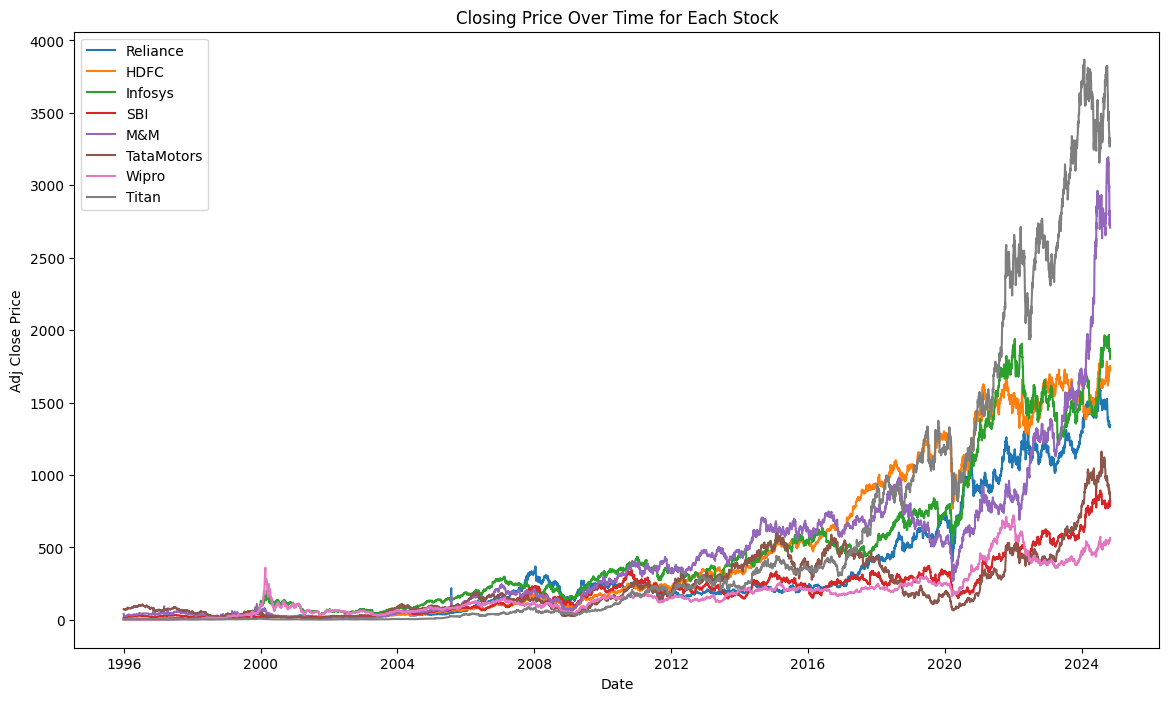

In [99]:
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime format 
df['Date'] = pd.to_datetime(df['Date'])

# Plot closing prices for each stock
unique_stocks = df['Stock'].unique()
plt.figure(figsize=(14, 8))
for stock in unique_stocks:
    plt.plot(df[df['Stock'] == stock]['Date'], 
             df[df['Stock'] == stock]['Close'], 
             label=stock)

plt.title('Closing Price Over Time for Each Stock')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

### visualize Volume for Each Stock

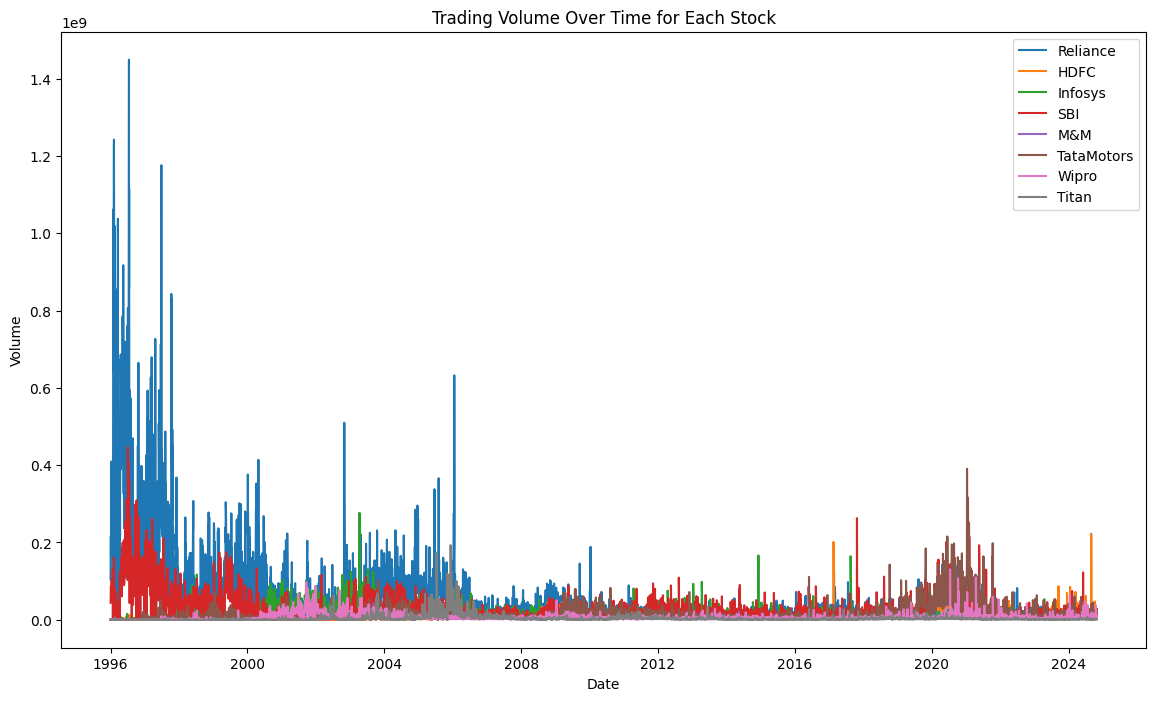

In [100]:
# Plot volume over time for each stock
plt.figure(figsize=(14, 8))
for stock in unique_stocks:
    plt.plot(df[df['Stock'] == stock]['Date'], 
             df[df['Stock'] == stock]['Volume'], 
             label=stock)

plt.title('Trading Volume Over Time for Each Stock')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

## HDFC Stock

In [7]:
HDFC_data=pd.read_csv("HDFC.csv")
HDFC_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,3.030000,3.030000,2.925000,2.980000,2.331029,350000
1,1996-01-02,2.980000,3.025000,2.950000,2.975000,2.327118,412000
2,1996-01-03,2.975000,2.995000,2.950000,2.985000,2.334940,284000
3,1996-01-04,2.985000,2.980000,2.940000,2.965000,2.319295,282000
4,1996-01-05,2.965000,2.980000,2.950000,2.960000,2.315385,189000
...,...,...,...,...,...,...,...
7237,2024-10-23,1705.050049,1746.500000,1705.050049,1735.800049,1735.800049,19018045
7238,2024-10-24,1738.099976,1768.650024,1738.099976,1749.650024,1749.650024,15416129
7239,2024-10-25,1755.000000,1757.849976,1728.699951,1743.400024,1743.400024,13065239
7240,2024-10-28,1742.000000,1751.000000,1728.900024,1734.199951,1734.199951,11006071


In [4]:
HDFC_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7242 entries, 0 to 7241
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       7242 non-null   object 
 1   Open       7242 non-null   float64
 2   High       7242 non-null   float64
 3   Low        7242 non-null   float64
 4   Close      7242 non-null   float64
 5   Adj Close  7242 non-null   float64
 6   Volume     7242 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 396.2+ KB


### Visualizaton of closing price 

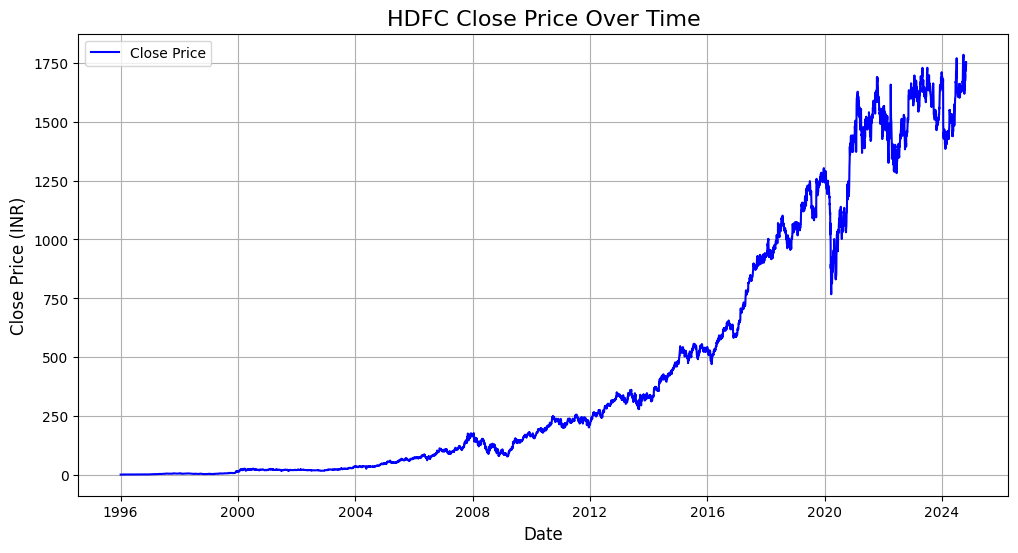

In [5]:
HDFC_data['Date'] = pd.to_datetime(HDFC_data['Date'])
HDFC_data = HDFC_data.sort_values('Date')

# Plot the Close Price
plt.figure(figsize=(12, 6))
plt.plot(HDFC_data['Date'], HDFC_data['Close'], label='Close Price', color='blue')
plt.title('HDFC Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price (INR)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

### Visualization of volume

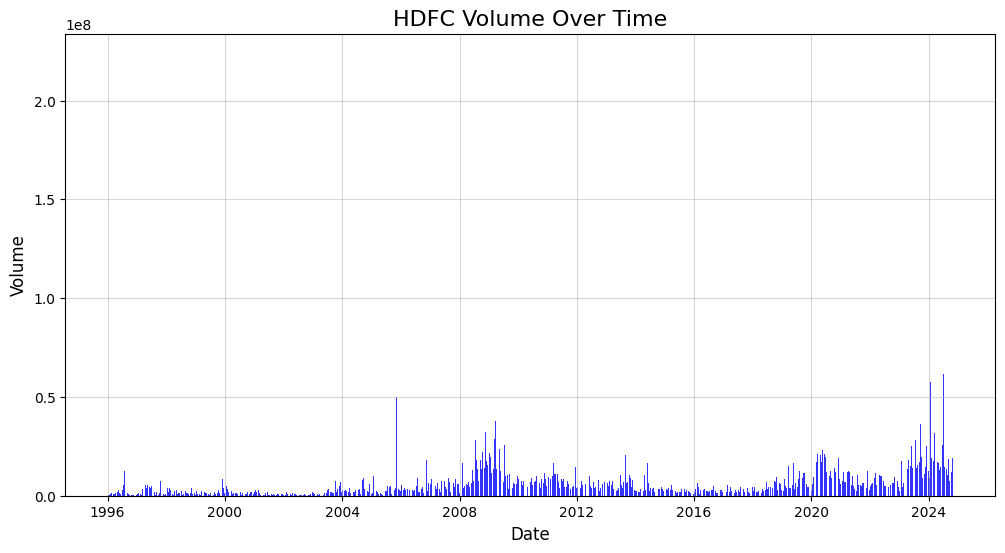

In [104]:
plt.figure(figsize=(12, 6))
plt.bar(HDFC_data['Date'], HDFC_data['Volume'], color='blue', alpha=0.8, width=1.0)
plt.title('HDFC Volume Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.grid(True, alpha=0.5)
plt.show()

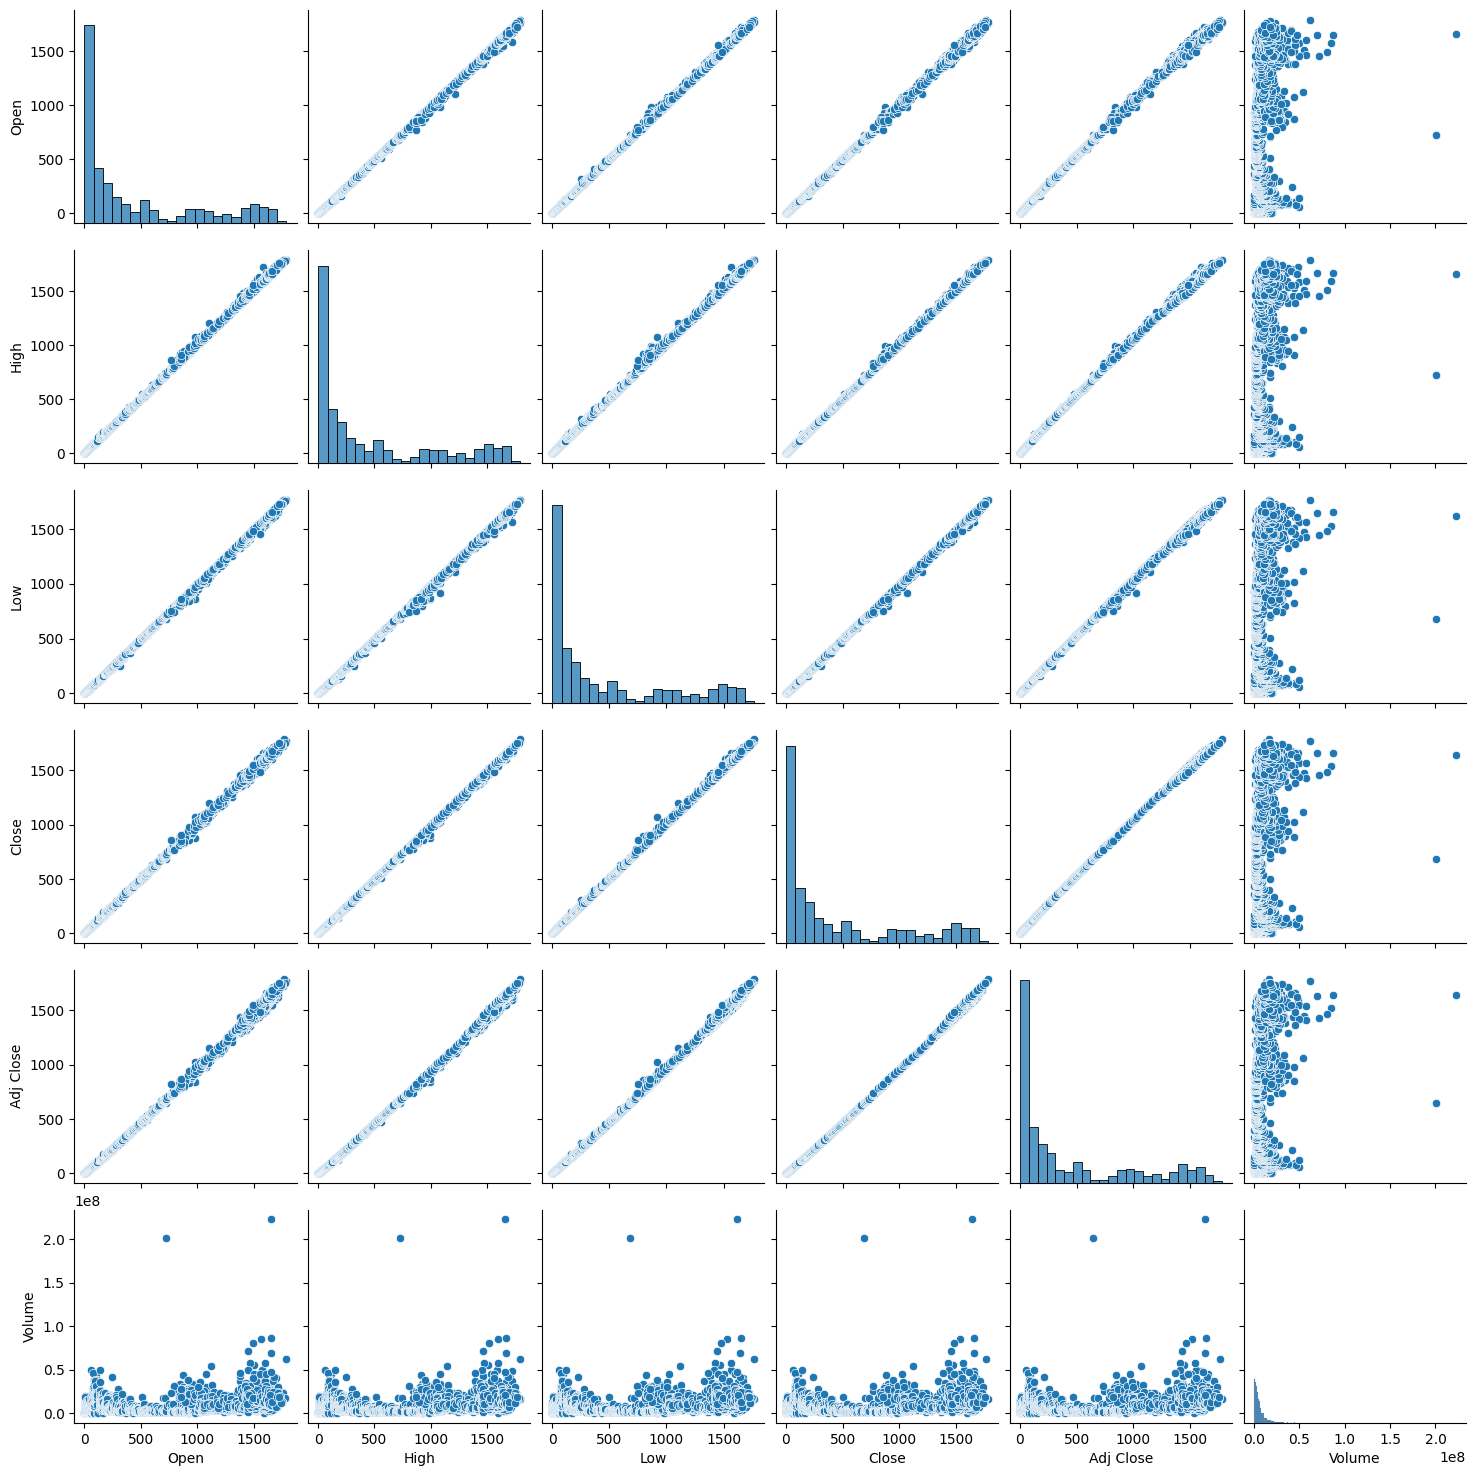

In [7]:
sns.pairplot(HDFC_data)

<Axes: >

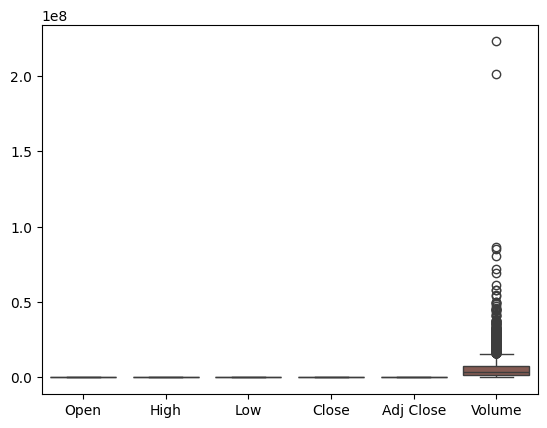

In [105]:
sns.boxplot(HDFC_data)

### Calculating Stock Indicators

In [8]:
# Calculate SMA20
HDFC_data['SMA20'] = HDFC_data['Close'].rolling(window=20).mean()

# Calculate EMA20
HDFC_data['EMA20'] = HDFC_data['Close'].ewm(span=20, adjust=False).mean()

HDFC_data

,Date,Open,High,Low,Close,Adj Close,Volume,SMA20,EMA20
0,1996-01-01,3.030000,3.030000,2.925000,2.980000,2.331029,350000,NaN,2.980000
1,1996-01-02,2.980000,3.025000,2.950000,2.975000,2.327118,412000,NaN,2.979524
2,1996-01-03,2.975000,2.995000,2.950000,2.985000,2.334940,284000,NaN,2.980045
3,1996-01-04,2.985000,2.980000,2.940000,2.965000,2.319295,282000,NaN,2.978612
4,1996-01-05,2.965000,2.980000,2.950000,2.960000,2.315385,189000,NaN,2.976840
...,...,...,...,...,...,...,...,...,...
7237,2024-10-23,1705.050049,1746.500000,1705.050049,1735.800049,1735.800049,19018045,1696.727509,1693.477267
7238,2024-10-24,1738.099976,1768.650024,1738.099976,1749.650024,1749.650024,15416129,1695.255011,1698.827053
7239,2024-10-25,1755.000000,1757.849976,1728.699951,1743.400024,1743.400024,13065239,1693.252515,1703.072098
7240,2024-10-28,1742.000000,1751.000000,1728.900024,1734.199951,1734.199951,11006071,1692.330011,1706.036656


In [9]:
HDFC_data.isna().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
SMA20        19
EMA20         0
dtype: int64

In [10]:
HDFC_data['SMA20'] = HDFC_data['SMA20'].fillna(method='bfill')  #filling na values with backward fill
HDFC_data['Date'] = pd.to_datetime(HDFC_data['Date'])  #converting date to datetime
HDFC_data.set_index('Date', inplace=True)    #set date as index

HDFC_data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
SMA20        0
EMA20        0
dtype: int64

In [11]:
HDFC_data

,Date,Open,High,Low,Close,Adj Close,Volume,SMA20,EMA20
0,1996-01-01,3.030000,3.030000,2.925000,2.980000,2.331029,350000,2.745250,2.980000
1,1996-01-02,2.980000,3.025000,2.950000,2.975000,2.327118,412000,2.745250,2.979524
2,1996-01-03,2.975000,2.995000,2.950000,2.985000,2.334940,284000,2.745250,2.980045
3,1996-01-04,2.985000,2.980000,2.940000,2.965000,2.319295,282000,2.745250,2.978612
4,1996-01-05,2.965000,2.980000,2.950000,2.960000,2.315385,189000,2.745250,2.976840
...,...,...,...,...,...,...,...,...,...
7237,2024-10-23,1705.050049,1746.500000,1705.050049,1735.800049,1735.800049,19018045,1696.727509,1693.477267
7238,2024-10-24,1738.099976,1768.650024,1738.099976,1749.650024,1749.650024,15416129,1695.255011,1698.827053
7239,2024-10-25,1755.000000,1757.849976,1728.699951,1743.400024,1743.400024,13065239,1693.252515,1703.072098
7240,2024-10-28,1742.000000,1751.000000,1728.900024,1734.199951,1734.199951,11006071,1692.330011,1706.036656


In [12]:
HDFC_data.corr()

,Open,High,Low,Close,Adj Close,Volume,SMA20,EMA20
Open,1.000000,0.999932,0.999929,0.999869,0.999601,0.397632,0.999060,0.999340
High,0.999932,1.000000,0.999900,0.999944,0.999667,0.399711,0.999075,0.999354
Low,0.999929,0.999900,1.000000,0.999934,0.999689,0.395116,0.998976,0.999263
Close,0.999869,0.999944,0.999934,1.000000,0.999735,0.397174,0.998997,0.999281
Adj Close,0.999601,0.999667,0.999689,0.999735,1.000000,0.401372,0.998783,0.999068
Volume,0.397632,0.399711,0.395116,0.397174,0.401372,1.000000,0.400180,0.400223
SMA20,0.999060,0.999075,0.998976,0.998997,0.998783,0.400180,1.000000,0.999946
EMA20,0.999340,0.999354,0.999263,0.999281,0.999068,0.400223,0.999946,1.000000


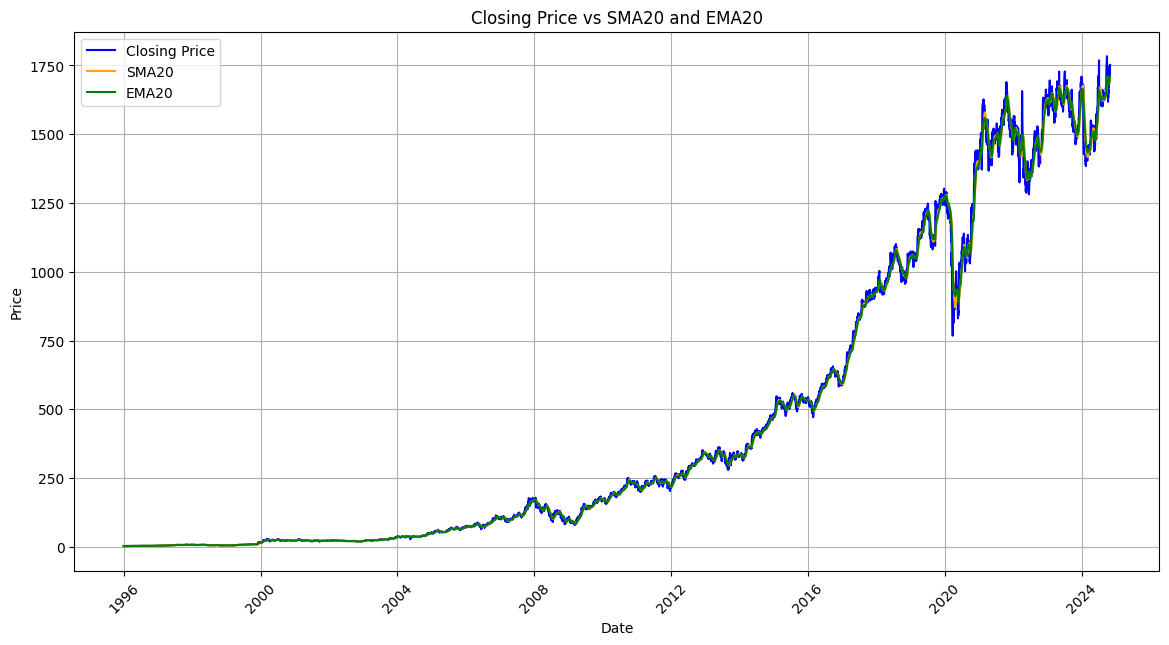

In [12]:
#plot of SMA20 and EMA20 over close price
plt.figure(figsize=(14, 7))
plt.plot(HDFC_data.index, HDFC_data['Close'], label='Closing Price', color='blue')

plt.plot(HDFC_data.index, HDFC_data['SMA20'], label='SMA20', color='orange')

plt.plot(HDFC_data.index, HDFC_data['EMA20'], label='EMA20', color='green')

plt.title('Closing Price vs SMA20 and EMA20')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

### Spliting data in Train and Test

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Define features (X) and target (y)
x = HDFC_data[['Open', 'High', 'Low', 'Volume']]
y = HDFC_data['Close']
# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Scale the features and target using MinMaxScaler
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

x_train_scaled = scaler_x.fit_transform(x_train)
x_test_scaled = scaler_x.transform(x_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

In [17]:
x_train_scaled.shape

(5793, 4)

In [18]:
y_train_scaled.shape

(5793, 1)

In [19]:
x_test_scaled.shape

(1449, 4)

In [20]:
y_test_scaled.shape

(1449, 1)

## Linear Regression

In [21]:
# Train a regression model
model_lr = LinearRegression() 
model_lr.fit(x_train_scaled, y_train_scaled)

# Make predictions on the test set
y_pred_scaled_lr = model_lr.predict(x_test_scaled)

In [22]:
# Inverse transform predictions to the original scale
y_pred_original_lr = scaler_y.inverse_transform(y_pred_scaled_lr.reshape(-1, 1))
y_test_original_lr = scaler_y.inverse_transform(y_test_scaled)

In [27]:
# computing accuracy for test dataset
from sklearn.metrics import mean_squared_error, mean_absolute_error,root_mean_squared_error,r2_score

mse_lr = mean_squared_error(y_test_original_lr, y_pred_original_lr)
mae_lr = mean_absolute_error(y_test_original_lr, y_pred_original_lr)
rmse_lr=root_mean_squared_error(y_test_original_lr, y_pred_original_lr)
r2_lr=r2_score(y_test_original_lr,y_pred_original_lr)
print(f"Mean Squared Error(mse)_lr: {mse_lr}")
print(f"Mean Absolute Error(mae)_lr: {mae_lr}")
print(f"root mean squared Error(rmse)_lr: {rmse_lr}")
print(f"r2 score_lr:{r2_lr}")

Mean Squared Error(mse)_lr: 11.30466032416326
Mean Absolute Error(mae)_lr: 1.6659960199653694
root mean squared Error(rmse)_lr: 3.362240372751963
r2 score_lr:0.999960652745179


In [26]:
## just for checking overfitting
### computing accuracy for train dataset
y_pred_scaled_lr_train = model_lr.predict(x_train_scaled)
# Inverse transform predictions to the original scale
y_pred_original_lr_train = scaler_y.inverse_transform(y_pred_scaled_lr_train.reshape(-1, 1))
y_train_original_lr = scaler_y.inverse_transform(y_train_scaled)

# Model Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error,root_mean_squared_error,r2_score

mse_lr = mean_squared_error(y_train_original_lr, y_pred_original_lr_train)
mae_lr = mean_absolute_error(y_train_original_lr, y_pred_original_lr_train)
rmse_lr=root_mean_squared_error(y_train_original_lr, y_pred_original_lr_train)
r2_lr=r2_score(y_train_original_lr,y_pred_original_lr_train)
print(f"Mean Squared Error(mse)_lr: {mse_lr}")
print(f"Mean Absolute Error(mae)_lr: {mae_lr}")
print(f"root mean squared Error(rmse)_lr: {rmse_lr}")
print(f"r2 score_lr:{r2_lr}")

## There is no overfitting

Mean Squared Error(mse)_lr: 12.382180006706413
Mean Absolute Error(mae)_lr: 1.7845589774627502
root mean squared Error(rmse)_lr: 3.518832193598668
r2 score_lr:0.9999578365823283


In [18]:
compare_df_lr = pd.DataFrame({"Actual Price": y_test_original_lr.flatten(),"Predicted Price": y_pred_original_lr.flatten()},index=y_test.index)
compare_df_lr

,Actual Price,Predicted Price
Date,,
1997-12-12,7.020000,7.232412
2012-04-12,265.200012,265.986846
2010-09-14,233.419998,233.257586
2001-09-03,23.495001,23.470033
2007-07-25,123.904999,122.062362
...,...,...
2023-05-25,1609.599976,1604.573902
2010-12-14,223.824997,224.416828
2012-11-16,321.125000,322.513262


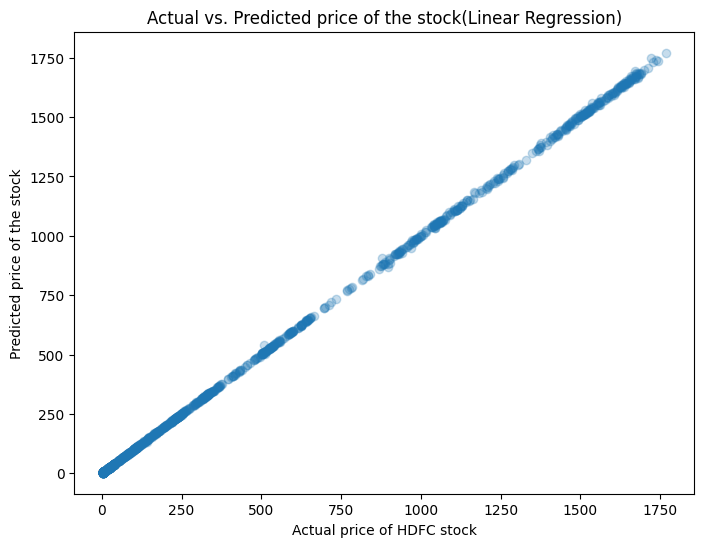

In [19]:
# Actual vs Predicted Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original_lr, y_pred_original_lr,alpha=0.25)
plt.xlabel('Actual price of HDFC stock')
plt.ylabel('Predicted price of the stock')
plt.title('Actual vs. Predicted price of the stock(Linear Regression)')
plt.show()

## Random Forest Regressor

In [119]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(x_train_scaled, y_train_scaled.ravel())

# Predictions
y_pred_scaled_rf = model_rf.predict(x_test_scaled)

# Inverse transform predictions and actual values
y_pred_original_rf = scaler_y.inverse_transform(y_pred_scaled_rf.reshape(-1, 1))
y_test_original_rf = scaler_y.inverse_transform(y_test_scaled)

In [120]:
# Model Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error,root_mean_squared_error

mse_rf = mean_squared_error(y_test_original_rf, y_pred_original_rf)
mae_rf = mean_absolute_error(y_test_original_rf, y_pred_original_rf)
rmse_rf=root_mean_squared_error(y_test_original_rf, y_pred_original_rf)
r2_rf=r2_score(y_test_original_rf,y_pred_original_rf)
print(f"Mean Squared Error(mse)_rf: {mse_rf}")
print(f"Mean Absolute Error(mae)_rf: {mae_rf}")
print(f"root mean squared Error(rmse)_rf: {rmse_rf}")
print(f"r2 score_rf:{r2_rf}")

Mean Squared Error(mse)_rf: 23.607454560459082
Mean Absolute Error(mae)_rf: 2.217626233081134
root mean squared Error(rmse)_rf: 4.858750308511344
r2 score_rf:0.9999178313630281


In [121]:
# Create a DataFrame for comparison
compare_df_rf = pd.DataFrame({"Actual Price": y_test_original_rf.flatten(),"Predicted Price": y_pred_original_rf.flatten()})
compare_df_rf.head(10)

,Actual Price,Predicted Price
0,7.020000,7.124900
1,265.200012,265.036003
2,233.419998,232.892347
3,23.495001,23.360150
4,123.904999,122.532099
5,497.575012,499.826500
6,23.475000,23.212550
7,23.180000,22.943400
8,1630.550049,1634.153007
9,226.470001,225.794049


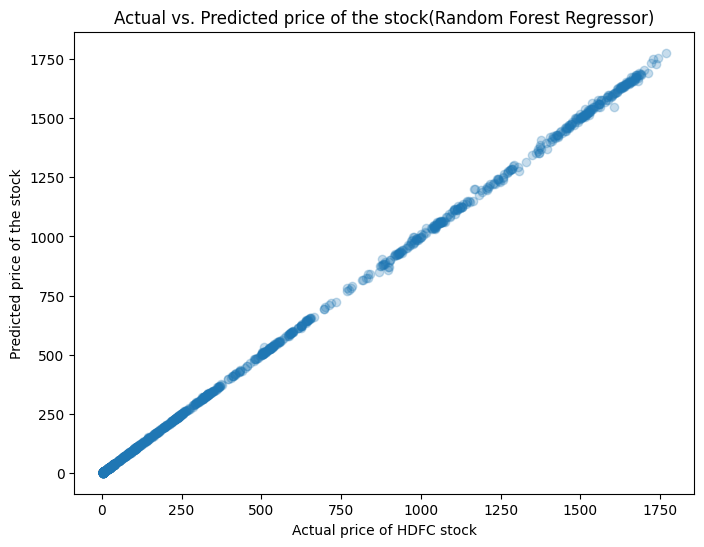

In [122]:
# Actual vs Predicted Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original_rf, y_pred_original_rf,alpha=0.25)
plt.xlabel('Actual price of HDFC stock')
plt.ylabel('Predicted price of the stock')
plt.title('Actual vs. Predicted price of the stock(Random Forest Regressor)')
plt.show()

## XGBoost

In [123]:
import xgboost as xgb

model_xgb = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_xgb.fit(x_train_scaled, y_train_scaled.ravel()) 

# Make predictions on the scaled test data
y_pred_scaled_xgb = model_xgb.predict(x_test_scaled)

# Inverse transform predictions and actual values
y_pred_original_xgb = scaler_y.inverse_transform(y_pred_scaled_xgb.reshape(-1, 1))
y_test_original_xgb = scaler_y.inverse_transform(y_test_scaled)

In [124]:
# Model Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error,root_mean_squared_error

mse_xgb = mean_squared_error(y_test_original_xgb, y_pred_original_xgb)
mae_xgb = mean_absolute_error(y_test_original_xgb, y_pred_original_xgb)
rmse_xgb=root_mean_squared_error(y_test_original_xgb, y_pred_original_xgb)
r2_xgb=r2_score(y_test_original_xgb,y_pred_original_xgb)
print(f"Mean Squared Error(mse)_xgb: {mse_xgb}")
print(f"Mean Absolute Error(mae)_xgb: {mae_xgb}")
print(f"root mean squared Error(rmse)_xgb: {rmse_xgb}")
print(f"r2 score_xgb:{r2_xgb}")

Mean Squared Error(mse)_xgb: 43.668731862230466
Mean Absolute Error(mae)_xgb: 3.5217275163730797
root mean squared Error(rmse)_xgb: 6.608232128355546
r2 score_xgb:0.9998480056303308


In [125]:
# DataFrame for comparison for actual vs predicted
compare_df_xgb = pd.DataFrame({"Actual Price": y_test_original_xgb.flatten(),"Predicted Price": y_pred_original_xgb.flatten()})
compare_df_xgb.head(10)

,Actual Price,Predicted Price
0,7.020000,7.374753
1,265.200012,262.466278
2,233.419998,233.262024
3,23.495001,23.591738
4,123.904999,129.760818
5,497.575012,502.688751
6,23.475000,23.275236
7,23.180000,23.264191
8,1630.550049,1632.058960
9,226.470001,226.202713


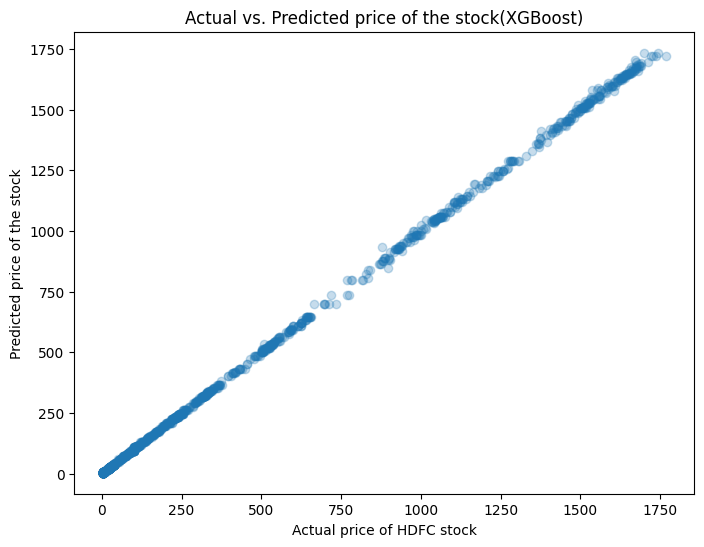

In [126]:
# Actual vs Predicted Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original_xgb, y_pred_original_xgb,alpha=0.25)
plt.xlabel('Actual price of HDFC stock')
plt.ylabel('Predicted price of the stock')
plt.title('Actual vs. Predicted price of the stock(XGBoost)')
plt.show()

## Model Performance

In [127]:
performance_dict = {
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'MSE': [mse_lr, mse_rf, mse_xgb],
    'MAE': [mae_lr, mae_rf, mae_xgb],
    'RMSE': [rmse_lr, rmse_rf, rmse_xgb],
    'R2 Score': [r2_lr, r2_rf, r2_xgb]
}
# Create a DataFrame from the dictionary
performance_df = pd.DataFrame(performance_dict)

# Display the performance dataframe
performance_df

,Model,MSE,MAE,RMSE,R2 Score
0,Linear Regression,11.304660,1.665996,3.362240,0.999961
1,Random Forest,23.607455,2.217626,4.858750,0.999918
2,XGBoost,43.668732,3.521728,6.608232,0.999848


In [38]:
#saving model
import pickle

with open("model_lr.pkl", "wb") as file:
    pickle.dump(model_lr, file)

In [39]:
# Saving the MinMaxScaler for features (x) and target (y)
import pickle

with open('scaler_x.pkl', 'wb') as file:
    pickle.dump(scaler_x, file)

with open('scaler_y.pkl', 'wb') as file:
    pickle.dump(scaler_y, file)

In [ ]:
## tesing for time series 

In [9]:
HDFC_data=pd.read_csv("HDFC.csv")
HDFC_data['Date'] = pd.to_datetime(HDFC_data['Date'])
HDFC_data = HDFC_data.sort_values('Date')
HDFC_data.set_index('Date', inplace=True)

In [10]:
HDFC_data=HDFC_data[['Close']]
HDFC_data.tail()

,Close
Date,
2024-10-23,1735.800049
2024-10-24,1749.650024
2024-10-25,1743.400024
2024-10-28,1734.199951
2024-10-29,1751.849976


In [11]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] < 0.05:
        print("The time series is stationary.")
    else:
        print("The time series is not stationary. Differencing is required.")

test_stationarity(HDFC_data['Close'])

ADF Statistic: 1.0851185025467873
p-value: 0.9950875923804957
The time series is not stationary. Differencing is required.


In [12]:
HDFC_data['Close_diff'] = HDFC_data['Close'].diff() 
HDFC_data.dropna(inplace=True) 

# Test stationarity again
test_stationarity(HDFC_data['Close_diff'])

ADF Statistic: -14.771377511437915
p-value: 2.3196312496425903e-27
The time series is stationary.


In [13]:
from pmdarima import auto_arima

# Automatically find the best (p, d, q)
auto_model = auto_arima(HDFC_data['Close'], seasonal=False, trace=True)
print(auto_model.summary())

# Use the suggested (p, d, q) values
best_p, best_d, best_q = auto_model.order

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=54198.439, Time=12.69 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=54224.052, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=54217.192, Time=0.42 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=54216.219, Time=1.65 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=54226.086, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=54202.267, Time=2.92 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=54200.677, Time=7.57 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=54168.446, Time=17.28 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=54198.642, Time=6.64 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=54142.083, Time=24.80 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=54194.220, Time=10.50 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=54141.238, Time=26.04 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=54164.588, Time=15.21 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=54143.153, Time=22.87 sec
 ARIMA(4,1,3

In [ ]:
# we got Best model:  ARIMA(5,1,2)(0,0,0)[0] intercept

In [14]:
from statsmodels.tsa.arima.model import ARIMA

# Define and fit the ARIMA model
model = ARIMA(HDFC_data['Close'], order=(5, 1, 2))
model_fit = model.fit()

# Print summary
#print(model_fit.summary())

# Forecast next 7 days

forecast = model_fit.forecast(steps=7)
print("Forecasted Prices:", forecast)

C:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasted Prices: 7241    1756.720226
7242    1752.415629
7243    1752.866309
7244    1754.979172
7245    1752.083262
7246    1754.109235
7247    1753.997199
Name: predicted_mean, dtype: float64


C:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


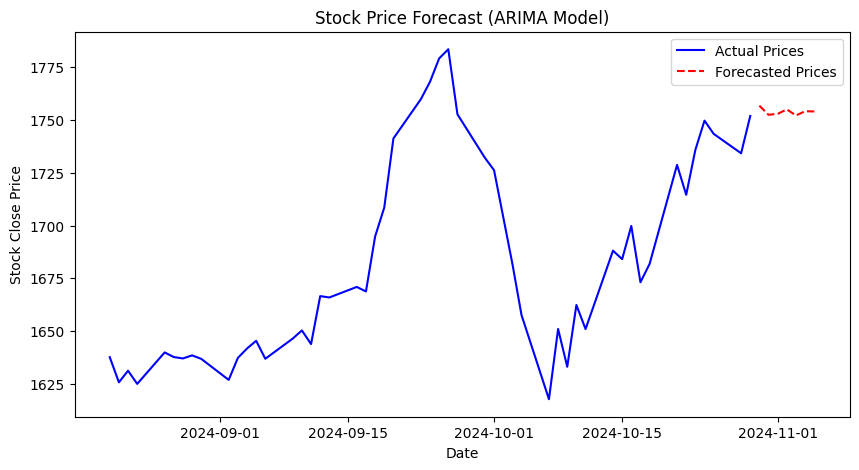

In [18]:
plt.figure(figsize=(10,5))

# Plot last 50 days of actual data
plt.plot(HDFC_data.index[-50:], HDFC_data['Close'].iloc[-50:], label="Actual Prices", color='blue')

# Plot forecasted values
future_dates = pd.date_range(start=HDFC_data.index[-1], periods=8, freq='D')[1:]
plt.plot(future_dates, forecast, label="Forecasted Prices", color='red', linestyle='dashed')

plt.xlabel("Date")
plt.ylabel("Stock Close Price")
plt.title("Stock Price Forecast (ARIMA Model)")
plt.legend()
plt.show()

In [19]:
import pickle

# Save ARIMA model
with open("arima_model.pkl", "wb") as f:
    pickle.dump(model_fit, f)

In [ ]:
# test LSTM model

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler

In [60]:
df = pd.read_csv('HDFC.csv', parse_dates=['Date'], index_col='Date')

# Use only the 'Close' column for prediction
data = df[['Close']].values  

# Normalize data using MinMaxScaler (scale between 0 and 1)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Define training size (80% train, 20% test)
train_size = int(len(data_scaled) * 0.8)
train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]

In [61]:
def create_sequences(data, time_steps=50):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

# Define the time step (how many previous days to use)
time_steps = 50

# Create train and test sequences
X_train, y_train = create_sequences(train_data, time_steps)
X_test, y_test = create_sequences(test_data, time_steps)

# Reshape input to match LSTM expected shape (samples, time_steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [62]:
# Initialize the LSTM model
model = Sequential([
    LSTM(units=50, activation='relu',return_sequences=True, input_shape=(time_steps, 1)),
    Dropout(0.2),
    LSTM(units=50,activation='relu', return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=1)  # Output layer
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse',metrics=['mae','mse'])

# Model summary
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, 50, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 50, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 50, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 50, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 15s 57ms/step - loss: 0.0090 - mae: 0.0531 - mse: 0.0090 - val_loss: 0.0015 - val_mae: 0.0302 - val_mse: 0.0015
Epoch 2/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 4.9422e-04 - mae: 0.0133 - mse: 4.9422e-04 - val_loss: 0.0021 - val_mae: 0.0380 - val_mse: 0.0021
Epoch 3/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 4.3884e-04 - mae: 0.0130 - mse: 4.3884e-04 - val_loss: 0.0043 - val_mae: 0.0585 - val_mse: 0.0043
Epoch 4/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 4.1660e-04 - mae: 0.0119 - mse: 4.1660e-04 - val_loss: 0.0025 - val_mae: 0.0408 - val_mse: 0.0025
Epoch 5/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 3.8103e-04 - mae: 0.0119 - mse: 3.8103e-04 - val_loss: 0.0067 - val_mae: 0.0737 - val_mse: 0.0067
Epoch 6/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 3.4532e-04 - mae: 0.0114 - mse: 3.4532e-04 - val_loss: 0.0047 - val_mae: 0.0591 - val_mse: 0.0047
Epoch 7/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms

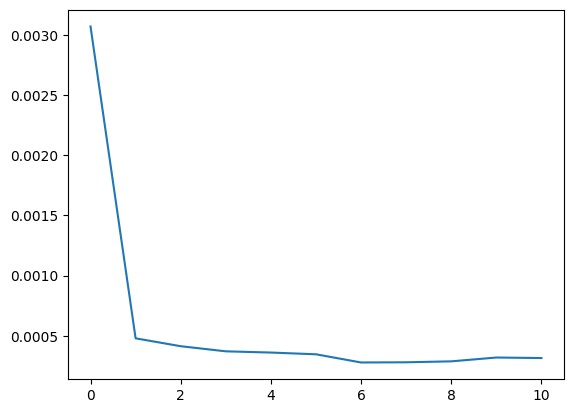

In [63]:
# Use early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, 
                    epochs=20, 
                    batch_size=32, 
                    validation_data=(X_test, y_test), 
                    callbacks=[early_stop])
loss = model.history.history['loss']
plt.plot(loss)

In [64]:
# Predict on test data
test_predictions = model.predict(X_test)

# Inverse transform the predictions to get original scale
test_predictions = scaler.inverse_transform(test_predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate evaluation metrics
mae = mean_absolute_error(y_test_actual, test_predictions)
mse = mean_squared_error(y_test_actual, test_predictions)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test_actual, test_predictions)*100

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Percentage Error: {mape:.2f}")

44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step
Mean Absolute Error: 53.83
Mean Squared Error: 4706.28
Root Mean Squared Error: 68.60
Mean Absolute Percentage Error: 3.97


In [65]:
#save model
model.save("lstm_stock_model.keras")